DATASET to UPLOAD: bfi

#**Exploratory Factor Analysis (EFA)**

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=999b815fd2db3c866c0d785ed89ec6614a646a6c79b7646867d83c2bdef78a37
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bfi.csv to bfi.csv


In [ ]:
# Load the dataset (ensure that the dataset file is named 'bfi.csv')
df = pd.read_csv("bfi.csv")
df.columns  # Display the column names to check the dataset structure

Index(['rownames', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2',
       'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [ ]:
# Drop unnecessary columns (identifiers and demographics) from the dataset
df.drop(['rownames', 'gender', 'education', 'age'], axis=1, inplace=True)

In [ ]:
# Remove any rows with missing values to ensure clean data
df.dropna(inplace=True)

In [ ]:
df.info()  # Get an overview of the dataset after cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  O3   

In [ ]:
df.head()  # Preview the first few rows of the dataset

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
# Import Bartlett's test to check for sphericity (necessary for factor analysis)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Bartlett’s test results (should be significant for factor analysis to be appropriate)
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value  # Display the test statistic and p-value

(18146.065577235386, 0.0)

In [ ]:
# Import KMO test to measure sampling adequacy (closer to 1 is better)
from factor_analyzer.factor_analyzer import calculate_kmo

# Perform KMO test for overall and variable-level adequacy
kmo_all, kmo_model = calculate_kmo(df)
kmo_model  # Check if KMO is above 0.6, indicating factor analysis is appropriate

0.8486452309468383

In [ ]:
# Create a FactorAnalyzer object and fit it to the data without rotation (to examine initial factor structure)
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation=None)
fa.fit(df)

# Retrieve eigenvalues to assess factor importance
ev, v = fa.get_eigenvalues()
ev  # Eigenvalues > 1 indicate significant factors

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

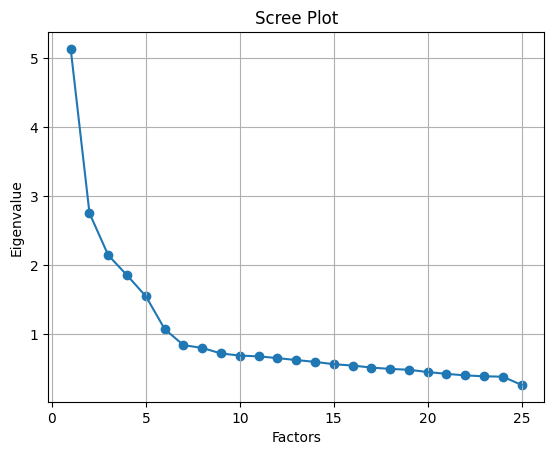

In [ ]:
# Plot a scree plot to visually assess the number of factors to retain
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Re-run factor analysis, now specifying 6 factors and using 'varimax' rotation to maximize variance explained
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation="varimax")
fa.fit(df)

# Extract the factor loadings (how strongly each variable loads on each factor)
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=df.columns))

           0         1         2         3         4         5
A1  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
A2  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
A3 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
A4 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356
A5 -0.149616  0.414458  0.106382  0.469698  0.030977  0.236519
C1 -0.004358  0.077248  0.554582  0.007511  0.190124  0.095035
C2  0.068330  0.038370  0.674545  0.057055  0.087593  0.152775
C3 -0.039994  0.031867  0.551164  0.101282 -0.011338  0.008996
C4  0.216283 -0.066241 -0.638475 -0.102617 -0.143846  0.318359
C5  0.284187 -0.180812 -0.544838 -0.059955  0.025837  0.132423
E1  0.022280 -0.590451  0.053915 -0.130851 -0.071205  0.156583
E2  0.233624 -0.684578 -0.088497 -0.116716 -0.045561  0.115065
E3 -0.000895  0.556774  0.103390  0.179396  0.241180  0.267291
E4 -0.136788  0.658395  0.113798  0.241143 -0.107808  0.158513
E5  0.034490  0.507535  0.309813  0.078804  0.200821  0

In [ ]:
# Perform factor analysis with 5 factors and varimax rotation
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(df)

# Display the updated factor loadings with 5 factors
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=df.columns))

           0         1         2         3         4
A1  0.111126  0.040465  0.022798 -0.428166 -0.077931
A2  0.029588  0.213716  0.139037  0.626946  0.062139
A3  0.009357  0.317848  0.109331  0.650743  0.056196
A4 -0.066476  0.204566  0.230584  0.435624 -0.112700
A5 -0.122113  0.393034  0.087869  0.537087  0.066708
C1  0.010416  0.070184  0.545824  0.038878  0.209584
C2  0.089574  0.033270  0.648731  0.102782  0.115434
C3 -0.030855  0.023907  0.557036  0.111578 -0.005183
C4  0.240410 -0.064984 -0.633806 -0.037498 -0.107535
C5  0.290318 -0.176395 -0.562467 -0.047525  0.036822
E1  0.042819 -0.574835  0.033144 -0.104813 -0.058795
E2  0.244743 -0.678731 -0.102483 -0.112517 -0.042010
E3  0.024180  0.536816  0.083010  0.257906  0.280877
E4 -0.115614  0.646833  0.102023  0.306101 -0.073422
E5  0.036145  0.504069  0.312899  0.090354  0.213739
N1  0.786807  0.078923 -0.045997 -0.216363 -0.084704
N2  0.754109  0.027301 -0.030568 -0.193744 -0.010304
N3  0.731721 -0.061430 -0.067084 -0.027712 -0.

In [ ]:
# Display the variance explained by each factor
print(pd.DataFrame(fa.get_factor_variance(), index=['Variance', 'Proportional Var', 'Cumulative Var']))

                         0         1         2         3         4
Variance          2.709633  2.473090  2.041106  1.844498  1.522153
Proportional Var  0.108385  0.098924  0.081644  0.073780  0.060886
Cumulative Var    0.108385  0.207309  0.288953  0.362733  0.423619


Variance: The higher the variance of a factor, the more important it is in explaining the variation in the data. Factors with higher variance contribute more significantly to the overall model.

Proportional Var: This column indicates the percentage of total variance explained by each factor. Factors with higher proportional variance are more efficient in explaining the data.

Cumulative Var: This column shows the cumulative proportion of variance explained by all factors up to that point. By examining the cumulative variance, you can assess how well the model fits the data. A high cumulative variance indicates that the model is able to explain a significant portion of the total variance.

In [ ]:
# Communalities help pinpoint the most important factors influencing the observed data.
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

    Communalities
A1       0.203905
A2       0.462803
A3       0.539692
A4       0.301905
A5       0.470020
C1       0.348395
C2       0.453872
C3       0.324289
C4       0.476699
C5       0.435383
E1       0.347809
E2       0.545502
E3       0.441055
E4       0.541257
E5       0.407146
N1       0.681398
N2       0.608003
N3       0.544475
N4       0.505803
N5       0.349316
O1       0.317339
O2       0.267452
O3       0.474643
O4       0.246035
O5       0.296284


**Insight example:**

Core Variables: Variables with high communalities (e.g., N1, N2, N3) are likely core variables that contribute significantly to the overall variance explained by the factors.

Less Important Variables: Variables with low communalities (e.g., A1, A4, O1, O2, O4) might be less important in explaining the overall variation in the data.

#**Principal Component Analysis (PCA)**

In [ ]:
# Load breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset and create the data/label arrays
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

# Output the shapes of the data and label arrays for sanity check
print("breast_data count: ", breast_data.shape)
print("breast_data labels: ", breast_labels.shape)

# Reshape labels to concatenate with data
labels = np.reshape(breast_labels, (569, 1))
final_breast_data = np.concatenate([breast_data, labels], axis=1)
print("Final breast_data count: ", final_breast_data.shape)

# Create a DataFrame for the breast cancer data and add label column
bdf = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features, 'label')
bdf.columns = features_labels

# Replace numerical labels with more descriptive names
bdf['label'].replace(0, 'Benign', inplace=True)
bdf['label'].replace(1, 'Malignant', inplace=True)
bdf.tail()  # Check the last few rows for correctness

breast_data count:  (569, 30)
breast_data labels:  (569,)
Final breast_data count:  (569, 31)


<ipython-input-18-f186253d3b0e>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bdf['label'].replace(0, 'Benign', inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [ ]:
# Standardize the feature set (necessary for PCA)
x = bdf.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalize features
x.shape  # Check the shape to ensure proper transformation

(569, 30)

In [ ]:
# Calculate and check mean and standard deviation (sanity check)
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [ ]:
# Create a DataFrame for the standardized features
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
nbdf = pd.DataFrame(x, columns=feat_cols)
nbdf.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [ ]:
# Apply PCA to reduce dimensions to 2 components for visualization
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [ ]:
# Create a DataFrame with the two principal components
pbdf = pd.DataFrame(data=principalComponents_breast, columns=['principal component 1', 'principal component 2'])
pbdf.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [ ]:
# Check how much variance is explained by each principal component
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


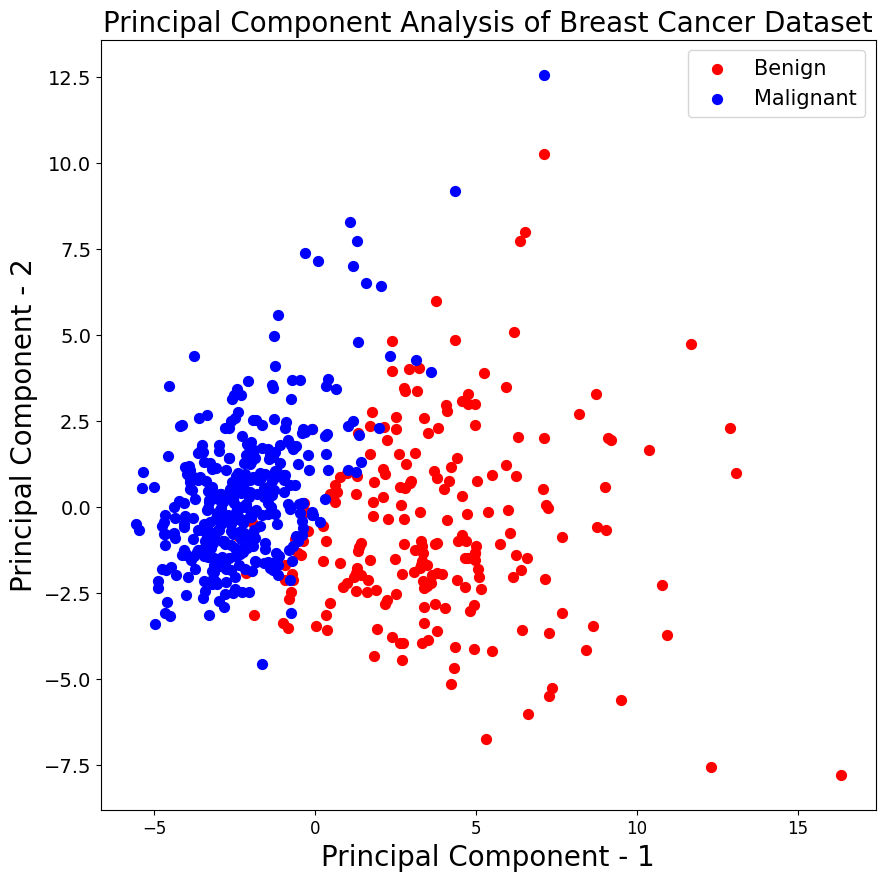

In [ ]:
# Plot the two principal components to visualize class separation
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'b']

# Plot points for each target class with distinct colors
for target, color in zip(targets, colors):
    indicesToKeep = bdf['label'] == target
    plt.scatter(pbdf.loc[indicesToKeep, 'principal component 1'], pbdf.loc[indicesToKeep, 'principal component 2'], c=color, s=50)

plt.legend(targets, prop={'size': 15})

The plot clearly shows a separation between benign and malignant cases. The red and blue clusters are relatively distinct, suggesting that PCA has effectively captured the features that differentiate these two classes.

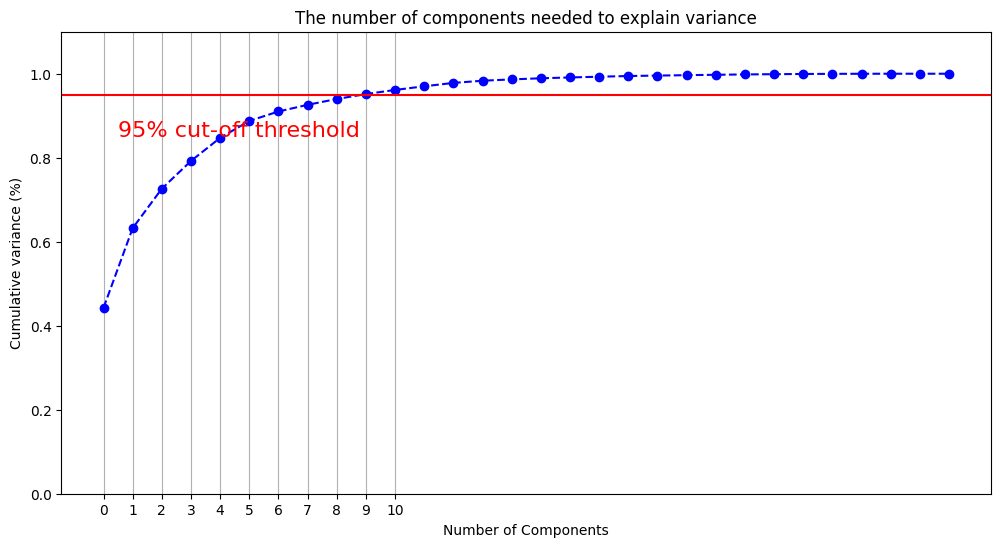

In [ ]:
# Fit PCA with all components and plot cumulative variance
pca = PCA().fit(x)
plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(0, 30, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# Draw a horizontal line to indicate the 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# Run PCA again with 10 components to check explained variance for those top components
pca_breast = PCA(n_components=10)
principalComponents_breast = pca_breast.fit_transform(x)

In [ ]:
# Create a DataFrame for the principal components
name_of_column = [['pc' + str(i) for i in range(10)]]
pbdf = pd.DataFrame(data=principalComponents_breast, columns=name_of_column)
pbdf.tail()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296
568,-5.475243,-0.670637,1.490443,2.299157,0.184703,1.617837,1.698952,1.046354,0.374101,-0.047726


In [ ]:
# Output the variance explained by the selected components
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
